<span style="font-size:30px;">Task 5: SQL-Based Analysis of Product Sales.</span>

In [42]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [43]:
DB_PATH = "/Users/jojo/elevvo internship/Task 5/Chinook_Sqlite.sqlite"   # change if your file path differs
conn = sqlite3.connect(DB_PATH)

<span style="font-size:20px;">1. Inspect available tables.</span>

In [44]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
print("Tables in DB:\n", tables)

Tables in DB:
              name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


<span style="font-size:20px;">2. Identify the key tables.</span>

In [45]:
invoice_table = "Invoice"
invoice_line_table = "InvoiceLine"
tracks_table = "Track"
albums_table = "Album"
artists_table = "Artist"
customers_table = "Customer"

<span style="font-size:20px;">3. Top-selling products.</span>

In [46]:
# by quantity and revenue
sql_top_products = f"""
SELECT il.TrackId AS TrackId,
       t.Name AS TrackName,
       al.Title AS AlbumTitle,
       ar.Name AS ArtistName,
       SUM(il.Quantity) AS TotalQuantity,
       ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS TotalRevenue
FROM "{invoice_line_table}" il
JOIN "{tracks_table}" t ON il.TrackId = t.TrackId
LEFT JOIN "{albums_table}" al ON t.AlbumId = al.AlbumId
LEFT JOIN "{artists_table}" ar ON al.ArtistId = ar.ArtistId
GROUP BY il.TrackId
ORDER BY TotalQuantity DESC, TotalRevenue DESC
LIMIT 16;
"""
top_products = pd.read_sql_query(sql_top_products, conn)
display(top_products)


,TrackId,TrackName,AlbumTitle,ArtistName,TotalQuantity,TotalRevenue
0,2832,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,2,3.98
1,2850,The Fix,"Heroes, Season 1",Heroes,2,3.98
2,2868,Walkabout,"Lost, Season 1",Lost,2,3.98
3,3177,Hot Girl,"The Office, Season 1",The Office,2,3.98
4,3200,Gay Witch Hunt,"The Office, Season 3",The Office,2,3.98
5,3214,Phyllis's Wedding,"The Office, Season 3",The Office,2,3.98
6,3223,How to Stop an Exploding Man,"Heroes, Season 1",Heroes,2,3.98
7,3250,Pilot,Aquaman,Aquaman,2,3.98
8,2,Balls to the Wall,Balls to the Wall,Accept,2,1.98
9,8,Inject The Venom,For Those About To Rock We Salute You,AC/DC,2,1.98


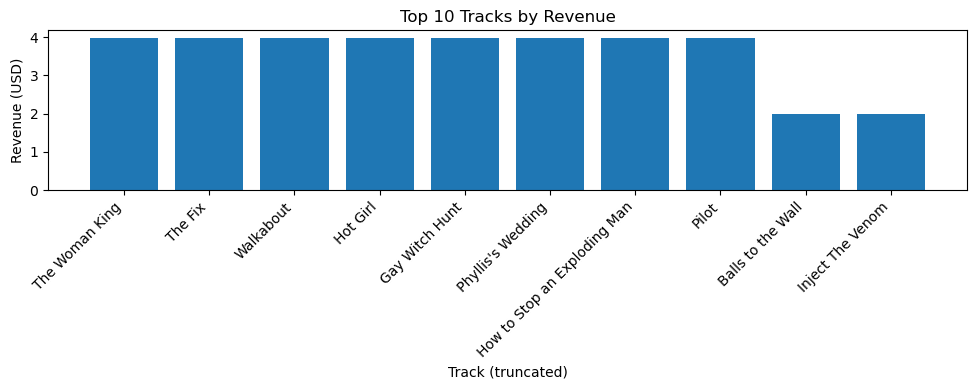

In [47]:
# Plot top 10 by revenue 
top_by_revenue = top_products.sort_values('TotalRevenue', ascending=False).head(10)
plt.figure(figsize=(10,4))
plt.bar(top_by_revenue['TrackName'].str.slice(0,40), top_by_revenue['TotalRevenue'])
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Tracks by Revenue")
plt.xlabel("Track (truncated)")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()

<span style="font-size:20px;">4. Revenue per region.</span>

In [48]:
# top 15 countries.
sql_rev_country = f"""
SELECT c.Country,
       COUNT(i.InvoiceId) AS NumInvoices,
       ROUND(SUM(i.Total),2) AS Revenue
FROM "{invoice_table}" i
JOIN "{customers_table}" c ON i.CustomerId = c.CustomerId
GROUP BY c.Country
ORDER BY Revenue DESC
LIMIT 16;
"""
rev_country = pd.read_sql_query(sql_rev_country, conn)
display(rev_country)

,Country,NumInvoices,Revenue
0,USA,91,523.06
1,Canada,56,303.96
2,France,35,195.10
3,Brazil,35,190.10
4,Germany,28,156.48
5,United Kingdom,21,112.86
6,Czech Republic,14,90.24
7,Portugal,14,77.24
8,India,13,75.26
9,Chile,7,46.62


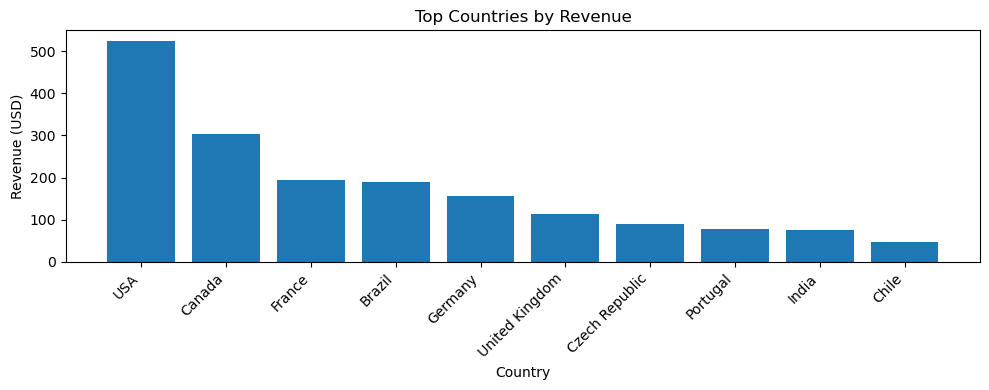

In [49]:
# Plot top countries by revenue
plt.figure(figsize=(10,4))
plt.bar(rev_country['Country'].astype(str).head(10), rev_country['Revenue'].head(10))
plt.xticks(rotation=45, ha='right')
plt.title("Top Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Revenue (USD)")
plt.tight_layout()
plt.show()

<span style="font-size:20px;">5. Monthly performance.</span>



In [50]:
# by invoices & revenue
sql_monthly = f"""
SELECT strftime('%Y-%m', i.InvoiceDate) AS YearMonth,
       COUNT(i.InvoiceId) AS NumInvoices,
       ROUND(SUM(i.Total),2) AS Revenue
FROM "{invoice_table}" i
GROUP BY YearMonth
ORDER BY YearMonth;
"""
monthly = pd.read_sql_query(sql_monthly, conn)
monthly['YearMonth_dt'] = pd.to_datetime(monthly['YearMonth'] + '-01')
display(monthly.head(24))

,YearMonth,NumInvoices,Revenue,YearMonth_dt
0,2009-01,6,35.64,2009-01-01
1,2009-02,7,37.62,2009-02-01
2,2009-03,7,37.62,2009-03-01
3,2009-04,7,37.62,2009-04-01
4,2009-05,7,37.62,2009-05-01
5,2009-06,7,37.62,2009-06-01
6,2009-07,7,37.62,2009-07-01
7,2009-08,7,37.62,2009-08-01
8,2009-09,7,37.62,2009-09-01
9,2009-10,7,37.62,2009-10-01


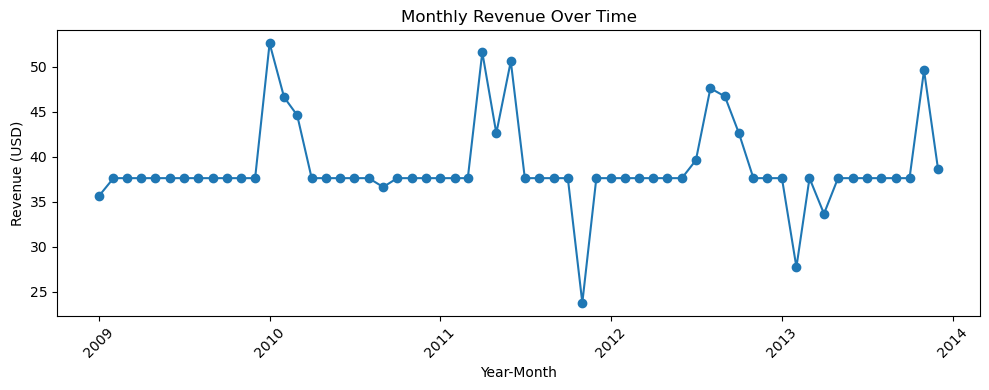

In [51]:
# Line chart: monthly revenue
plt.figure(figsize=(10,4))
plt.plot(monthly['YearMonth_dt'], monthly['Revenue'], marker='o')
plt.title("Monthly Revenue Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<span style="font-size:20px;">6. JOIN: product details combined with sales totals.</span>

In [52]:
sql_join_example = f"""
SELECT t.TrackId, t.Name AS TrackName, al.Title AS AlbumTitle, ar.Name AS ArtistName,
       SUM(il.Quantity) AS TotalQuantity, ROUND(SUM(il.UnitPrice * il.Quantity),2) AS TotalRevenue
FROM "{tracks_table}" t
LEFT JOIN "{albums_table}" al ON t.AlbumId = al.AlbumId
LEFT JOIN "{artists_table}" ar ON al.ArtistId = ar.ArtistId
JOIN "{invoice_line_table}" il ON il.TrackId = t.TrackId
GROUP BY t.TrackId
ORDER BY TotalRevenue DESC
LIMIT 16;
"""
join_example = pd.read_sql_query(sql_join_example, conn)
display(join_example)

,TrackId,TrackName,AlbumTitle,ArtistName,TotalQuantity,TotalRevenue
0,2832,The Woman King,"Battlestar Galactica, Season 3",Battlestar Galactica,2,3.98
1,2850,The Fix,"Heroes, Season 1",Heroes,2,3.98
2,2868,Walkabout,"Lost, Season 1",Lost,2,3.98
3,3177,Hot Girl,"The Office, Season 1",The Office,2,3.98
4,3200,Gay Witch Hunt,"The Office, Season 3",The Office,2,3.98
5,3214,Phyllis's Wedding,"The Office, Season 3",The Office,2,3.98
6,3223,How to Stop an Exploding Man,"Heroes, Season 1",Heroes,2,3.98
7,3250,Pilot,Aquaman,Aquaman,2,3.98
8,2820,Occupation / Precipice,"Battlestar Galactica, Season 3",Battlestar Galactica,1,1.99
9,2821,"Exodus, Pt. 1","Battlestar Galactica, Season 3",Battlestar Galactica,1,1.99


<span style="font-size:30px;">BONUS TASKS.</span>

<span style="font-size:20px;">1. top 3 tracks per country by revenue</span>

In [53]:
sql_window = f"""
WITH country_track_rev AS (
  SELECT c.Country, t.TrackId, t.Name AS TrackName, ROUND(SUM(il.UnitPrice * il.Quantity),2) AS TotalRevenue
  FROM "{invoice_line_table}" il
  JOIN "{invoice_table}" i ON il.InvoiceId = i.InvoiceId
  JOIN "{customers_table}" c ON i.CustomerId = c.CustomerId
  JOIN "{tracks_table}" t ON il.TrackId = t.TrackId
  GROUP BY c.Country, t.TrackId
)
SELECT Country, TrackName, TotalRevenue, revenue_rank FROM (
  SELECT Country, TrackName, TotalRevenue,
         RANK() OVER (PARTITION BY Country ORDER BY TotalRevenue DESC) AS revenue_rank
  FROM country_track_rev
)
WHERE revenue_rank <= 3
ORDER BY Country, revenue_rank;
"""
top_tracks_by_country = pd.read_sql_query(sql_window, conn)
display(top_tracks_by_country.head(200))


,Country,TrackName,TotalRevenue,revenue_rank
0,Argentina,Chemical Wedding,0.99,1
1,Argentina,Love Gun,0.99,1
2,Argentina,Deuce,0.99,1
3,Argentina,Opus No.1,0.99,1
4,Argentina,How High The Moon,0.99,1
...,...,...,...,...
195,Brazil,Rock And Roll Is Dead,0.99,3
196,Brazil,I Belong To You,0.99,3
197,Brazil,Casa,0.99,3
198,Brazil,A Cura,0.99,3
